In [9]:
import numpy as np
import string
import collections
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import gensim
import pickle

from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from google.colab import drive
drive.mount('/content/drive/')

baseFilepath = 'TODO'
epochNum = 3
batchSize = 64

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Sample LSTM on Keras' IMDB Dataset

In [0]:
# LSTM and CNN with Dropout for sequence classification in the IMDB dataset
# fix random seed for reproducibility
np.random.seed(7)

# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# truncate and pad input sequences
max_review_length = 500
X_train = preprocessing.sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = preprocessing.sequence.pad_sequences(X_test, maxlen=max_review_length)

# create the model
embedding_vecor_length = 32
model_imdb = Sequential()
model_imdb.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model_imdb.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_imdb.add(MaxPooling1D(pool_size=2))
model_imdb.add(Dropout(0.2))
model_imdb.add(LSTM(100))
model_imdb.add(Dropout(0.2))
model_imdb.add(Dense(1, activation='sigmoid'))
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_imdb.summary())

# train the model
model_imdb.fit(X_train, y_train, epochs=epochNum, batch_size=batchSize)

# Final evaluation of the model
scores = model_imdb.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

#  Data Preparation (Non-Word2Vec)

In [3]:
# file load
pos_examples = open(baseFilepath + 'rt-polarity.pos', encoding='ISO-8859-1').readlines()
neg_examples = open(baseFilepath + 'rt-polarity.neg', encoding='ISO-8859-1').readlines()

vocab = collections.defaultdict(int)
translator = str.maketrans('', '', string.punctuation)

# Tokenize all strings
token_pos = list(map(lambda ex: word_tokenize(ex.translate(translator)), pos_examples))
token_neg = list(map(lambda ex: word_tokenize(ex.translate(translator)), neg_examples))

# Get vocabulary size and max sentence length
max_sentence_length = 0
for ex_p, ex_n in zip(token_pos, token_neg):
    max_sentence_length = max(max_sentence_length, len(ex_p), len(ex_n))
    for word in ex_p:
        vocab[word] += 1
    for word in ex_n:
        vocab[word] += 1
        
vocab_size = len(vocab)
print("Vocabulary size: " + str(vocab_size))
print("Max sentence length: " + str(max_sentence_length))

# One-Hot encode and pad.
encoded_pos = [preprocessing.text.one_hot(ex, vocab_size) for ex in pos_examples]
padded_pos = preprocessing.sequence.pad_sequences(encoded_pos, maxlen=max_sentence_length, padding='post')
encoded_neg = [preprocessing.text.one_hot(ex, vocab_size) for ex in neg_examples]
padded_neg = preprocessing.sequence.pad_sequences(encoded_neg, maxlen=max_sentence_length, padding='post')

# Create train-test split
X = np.concatenate((padded_pos, padded_neg))
y = np.concatenate((np.ones(padded_pos.shape[0]), np.zeros(padded_neg.shape[0])))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Vocabulary size: 20490
Max sentence length: 51


# Barebones LSTM

In [8]:
LSTMs = [50, 75, 100, 125, 150]
EVLs = [64, 100, 128, 150, 256]
Es = [1, 2, 3, 4, 5, 10, 15]
results = []

for lstm_size in LSTMs:
  for evl in EVLs:
    for e in Es:
      # create the model
      embedding_vector_length = evl
      model_reproduce_base = Sequential()
      model_reproduce_base.add(Embedding(vocab_size, embedding_vector_length, input_length=max_sentence_length, embeddings_initializer='random_uniform'))
      model_reproduce_base.add(LSTM(lstm_size))
      model_reproduce_base.add(Dense(1, activation='sigmoid'))
      model_reproduce_base.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
      # print(model_reproduce_base.summary())

      # train the model
      model_reproduce_base.fit(X_train, y_train, epochs=e, batch_size=batchSize, verbose=0)

      # Final evaluation of the model
      scores = model_reproduce_base.evaluate(X_test, y_test, verbose=0)
      results.append((lstm_size, evl, e, scores[1]*100))
      print("Accuracy: %.2f%%" % (scores[1]*100))

print(results)

Accuracy: 49.18%
Accuracy: 49.18%
Accuracy: 73.79%
Accuracy: 54.29%
Accuracy: 73.70%
Accuracy: 74.12%
Accuracy: 73.65%
Accuracy: 49.18%
Accuracy: 49.18%
Accuracy: 74.31%
Accuracy: 49.18%
Accuracy: 74.92%
Accuracy: 73.93%
Accuracy: 74.26%
Accuracy: 50.82%
Accuracy: 69.20%
Accuracy: 56.02%
Accuracy: 74.31%
Accuracy: 64.84%
Accuracy: 52.88%
Accuracy: 73.65%
Accuracy: 49.18%
Accuracy: 51.62%
Accuracy: 62.17%
Accuracy: 49.79%
Accuracy: 73.75%
Accuracy: 74.40%
Accuracy: 59.40%
Accuracy: 49.18%
Accuracy: 50.82%
Accuracy: 66.10%
Accuracy: 58.18%
Accuracy: 60.34%
Accuracy: 53.54%
Accuracy: 71.73%
Accuracy: 49.18%
Accuracy: 50.87%
Accuracy: 73.18%
Accuracy: 60.38%
Accuracy: 62.63%
Accuracy: 73.61%
Accuracy: 72.86%
Accuracy: 49.18%
Accuracy: 59.54%
Accuracy: 50.87%
Accuracy: 74.26%
Accuracy: 73.79%
Accuracy: 59.45%
Accuracy: 65.07%
Accuracy: 49.18%
Accuracy: 59.77%
Accuracy: 74.96%
Accuracy: 60.57%
Accuracy: 50.82%
Accuracy: 74.68%
Accuracy: 73.56%
Accuracy: 50.82%
Accuracy: 63.95%
Accuracy: 69.5

## Peak Performance Plot

[ 75.         128.           3.          74.96483828]


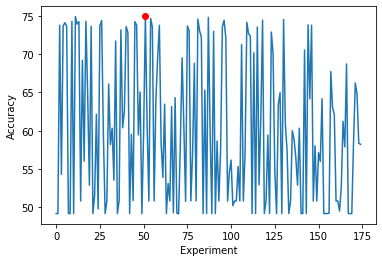

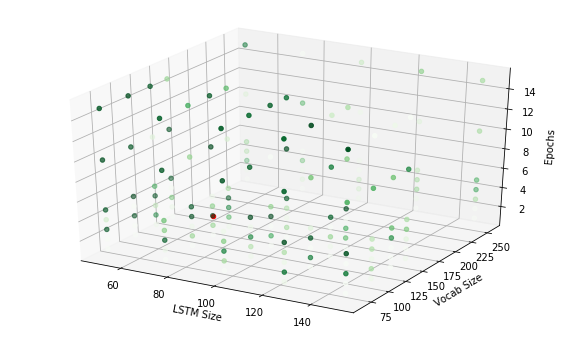

In [63]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

data = np.asarray(results)
accs = data[:, 3]
maxPoint = data[np.argmax(accs)]
print(maxPoint)

plt.plot(accs)
plt.plot(np.argmax(accs), maxPoint[3], "or")
plt.xlabel('Experiment'), plt.ylabel('Accuracy')
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
xdata = data[:, 0]
ydata = data[:, 1]
zdata = data[:, 2]
plt.xlabel('LSTM Size'), plt.ylabel('Vocab Size'), ax.set_zlabel('Epochs')
ax.scatter3D(xdata, ydata, zdata, c=accs, cmap='Greens')
ax.scatter3D(maxPoint[0], maxPoint[1], maxPoint[2], color='red')

# Naive Bayes Model

In [0]:
alphas = [1.0e-10, 0.25, 0.5, 0.75, 1, 2, 5, 10]
fit_priors = [True, False]
results = []

for a in alphas:
  for fp in fit_priors:
    model_NB1hot = MultinomialNB(alpha=a, fit_prior=fp, class_prior=None)
    model_NB1hot = model_NB1hot.fit(X_train, y_train)
    results.append((a, fp, model_NB1hot.score(X_test, y_test)))

print(results)

# LSTM with Dropout

In [0]:
# create the model
embedding_vector_length = 128
model_reproduce_mid = Sequential()
model_reproduce_mid.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_sentence_length, embeddings_initializer='random_uniform'))
model_reproduce_mid.add(Dropout(0.2))
model_reproduce_mid.add(LSTM(100))
model_reproduce_mid.add(Dropout(0.2))
model_reproduce_mid.add(Dense(1, activation='sigmoid'))
model_reproduce_mid.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_reproduce_mid.summary())

# train the model
model_reproduce_mid.fit(X_train, y_train, epochs=epochNum, batch_size=batchSize)

# Final evaluation of the model
scores = model_reproduce_mid.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# LSTM with CNN and Dropout

In [0]:
# create the model
embedding_vector_length = 128
model_reproduce_complex = Sequential()
model_reproduce_complex.add(Embedding(vocab_size, embedding_vecor_length, input_length=max_sentence_length, embeddings_initializer='random_uniform'))
model_reproduce_complex.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_reproduce_complex.add(MaxPooling1D(pool_size=2))
model_reproduce_complex.add(Dropout(0.2))
model_reproduce_complex.add(LSTM(100))
model_reproduce_complex.add(Dropout(0.2))
model_reproduce_complex.add(Dense(1, activation='sigmoid'))
model_reproduce_complex.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_reproduce_complex.summary())

# train the model
model_reproduce_complex.fit(X_train, y_train, epochs=epochNum, batch_size=batchSize)

# Final evaluation of the model
scores = model_reproduce_complex.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# Data Preparation (Word2Vec Embeddings)
Note that *mr.p* pickle file was generated in OriginalCode.ipynb from the same data.

In [0]:
def get_idx_from_sent(sent, word_idx_map, max_l=51, k=300, filter_h=5):
    """
    Transforms sentence into a list of indices. Pad with zeroes.
    """
    x = []
    pad = filter_h - 1
    for i in range(pad):
        x.append(0)
    words = sent.split()
    for word in words:
        if word in word_idx_map:
            x.append(word_idx_map[word])
    while len(x) < max_l+2*pad:
        x.append(0)
    return x

def make_idx_data_cv(revs, word_idx_map, cv, max_l=51, k=300, filter_h=5):
    """
    Transforms sentences into a 2-d matrix.
    """
    train, test = [], []
    for rev in revs:
        sent = get_idx_from_sent(rev["text"], word_idx_map, max_l, k, filter_h)   
        sent.append(rev["y"])
        if rev["split"]==cv:            
            test.append(sent)        
        else:
            train.append(sent)
    train = np.array(train,dtype="int")
    test = np.array(test,dtype="int")
    return [train, test]

x = pickle.load(open(baseFilepath + "OriginalCode/mr.p","rb"), encoding='latin1')
revs, W, W2, word_idx_map, vocabNew = x[0], x[1], x[2], x[3], x[4]
kFoldData = []
for i in range(10):
  kFoldData.append(make_idx_data_cv(revs, word_idx_map, i, max_l=56,k=300, filter_h=5))

# for simplification, only use the first fold
X_train, y_train, X_test, y_test = [], [], [], []
for i in range(kFoldData[0][0].shape[0]):
  X_train.append(kFoldData[0][0][i][:-1])
  y_train.append(kFoldData[0][0][i][-1])
for i in range(kFoldData[0][1].shape[0]):
  X_test.append(kFoldData[0][1][i][:-1])
  y_test.append(kFoldData[0][1][i][-1])
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Barebones LSTM (on Word2Vec-encoded data)

In [71]:
LSTMs = [50, 75, 100, 125, 150]
EVLs = [64, 100, 128, 150, 256]
Es = [1, 2, 3, 4, 5, 10, 15]
results = []

for lstm_size in LSTMs:
  for evl in EVLs:
    for e in Es:
      # create the model
      embedding_vector_length = evl
      model_reproduce_base = Sequential()
      model_reproduce_base.add(Embedding(len(vocabNew), embedding_vector_length, input_length=64, embeddings_initializer='random_uniform'))
      model_reproduce_base.add(LSTM(lstm_size))
      model_reproduce_base.add(Dense(1, activation='sigmoid'))
      model_reproduce_base.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
      # print(model_reproduce_base.summary())

      # train the model
      model_reproduce_base.fit(X_train, y_train, epochs=e, batch_size=64, verbose=0)

      # Final evaluation of the model
      scores = model_reproduce_base.evaluate(X_test, y_test, verbose=0)
      results.append((lstm_size, evl, e, scores[1]*100))
      print("Accuracy: %.2f%%" % (scores[1]*100))

print(results)

(9591, 64) (9591,) (1071, 64) (1071,)
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 64, 64)            1200896   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               66000     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 1,266,997
Trainable params: 1,266,997
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/25
9591/9591 [==============================] - 17s 2ms/step - loss: 0.6938 - acc: 0.5008
Epoch 2/25
9591/9591 [==============================] - 17s 2ms/step - loss: 0.6932 - acc: 0.5006
Epoch 3/25
9591/9591 [==============================] - 16s 2ms/step - loss: 0.6932 - acc: 0.5050
Epoch 4/25
9591/9591 [===============

## Peak Performance Plot

[50.         64.         10.         76.09710551]


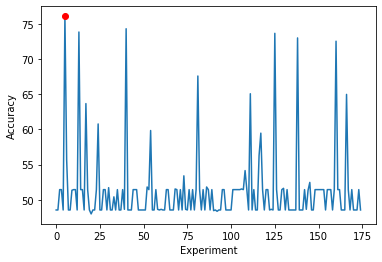

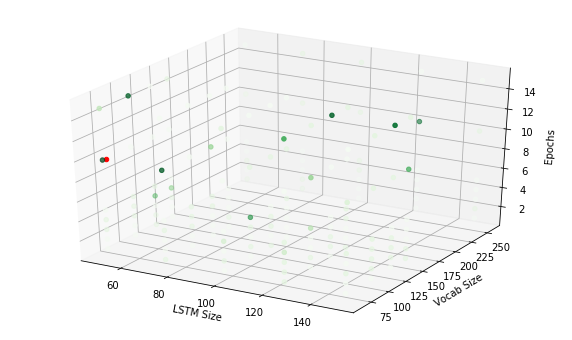

In [67]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

data = np.asarray([(50, 64, 1, 48.552754435107374), (50, 64, 2, 48.552754435107374), (50, 64, 3, 51.44724556489262), (50, 64, 4, 51.44724556489262), (50, 64, 5, 48.552754435107374), (50, 64, 10, 76.09710551443554), (50, 64, 15, 55.64892623716153), (50, 100, 1, 48.552754435107374), (50, 100, 2, 48.552754435107374), (50, 100, 3, 51.35387488328664), (50, 100, 4, 51.44724556489262), (50, 100, 5, 51.44724556489262), (50, 100, 10, 48.552754435107374), (50, 100, 15, 73.85620915589213), (50, 128, 1, 51.44724556489262), (50, 128, 2, 51.44724556489262), (50, 128, 3, 48.552754435107374), (50, 128, 4, 63.678804894232734), (50, 128, 5, 51.44724556489262), (50, 128, 10, 48.552754435107374), (50, 128, 15, 47.992530350341184), (50, 150, 1, 48.552754435107374), (50, 150, 2, 48.552754435107374), (50, 150, 3, 51.44724556489262), (50, 150, 4, 60.78431373662085), (50, 150, 5, 48.552754435107374), (50, 150, 10, 48.552754435107374), (50, 150, 15, 51.44724556489262), (50, 256, 1, 51.44724556489262), (50, 256, 2, 48.552754435107374), (50, 256, 3, 51.72735760971056), (50, 256, 4, 48.552754435107374), (50, 256, 5, 48.552754435107374), (50, 256, 10, 50.42016806722689), (50, 256, 15, 48.552754435107374), (75, 64, 1, 51.44724556489262), (75, 64, 2, 48.552754435107374), (75, 64, 3, 48.552754435107374), (75, 64, 4, 51.44724556489262), (75, 64, 5, 48.64612511671335), (75, 64, 10, 74.32306256392201), (75, 64, 15, 48.552754435107374), (75, 100, 1, 48.552754435107374), (75, 100, 2, 48.552754435107374), (75, 100, 3, 51.44724556489262), (75, 100, 4, 51.44724556489262), (75, 100, 5, 51.44724556489262), (75, 100, 10, 48.552754435107374), (75, 100, 15, 48.552754435107374), (75, 128, 1, 48.552754435107374), (75, 128, 2, 48.552754435107374), (75, 128, 3, 48.552754435107374), (75, 128, 4, 51.82072829688186), (75, 128, 5, 51.44724556489262), (75, 128, 10, 59.85060693169174), (75, 128, 15, 48.552754435107374), (75, 150, 1, 48.552754435107374), (75, 150, 2, 51.44724556489262), (75, 150, 3, 48.64612511671335), (75, 150, 4, 48.552754435107374), (75, 150, 5, 48.64612511671335), (75, 150, 10, 48.552754435107374), (75, 150, 15, 48.552754435107374), (75, 256, 1, 51.44724556489262), (75, 256, 2, 51.44724556489262), (75, 256, 3, 48.552754435107374), (75, 256, 4, 48.552754435107374), (75, 256, 5, 48.552754435107374), (75, 256, 10, 51.540616246498594), (75, 256, 15, 51.44724556489262), (100, 64, 1, 48.552754435107374), (100, 64, 2, 51.44724556489262), (100, 64, 3, 48.552754435107374), (100, 64, 4, 53.40802988418344), (100, 64, 5, 48.64612511671335), (100, 64, 10, 48.552754435107374), (100, 64, 15, 51.44724556489262), (100, 100, 1, 48.552754435107374), (100, 100, 2, 51.44724556489262), (100, 100, 3, 48.552754435107374), (100, 100, 4, 51.44724556489262), (100, 100, 5, 67.60037352168371), (100, 100, 10, 51.44724556489262), (100, 100, 15, 48.552754435107374), (100, 128, 1, 51.44724556489262), (100, 128, 2, 48.552754435107374), (100, 128, 3, 51.820728291316534), (100, 128, 4, 51.44724556489262), (100, 128, 5, 48.552754435107374), (100, 128, 10, 51.44724556489262), (100, 128, 15, 48.4593837535014), (100, 150, 1, 48.552754435107374), (100, 150, 2, 48.36601307189542), (100, 150, 3, 48.552754435107374), (100, 150, 4, 48.552754435107374), (100, 150, 5, 51.44724556489262), (100, 150, 10, 51.44724556489262), (100, 150, 15, 48.552754435107374), (100, 256, 1, 48.552754435107374), (100, 256, 2, 48.552754435107374), (100, 256, 3, 48.552754435107374), (100, 256, 4, 51.44724556489262), (100, 256, 5, 51.44724556489262), (100, 256, 10, 51.44724556489262), (100, 256, 15, 51.44724556489262), (125, 64, 1, 51.44724556489262), (125, 64, 2, 51.540616246498594), (125, 64, 3, 51.44724556489262), (125, 64, 4, 54.15499534259657), (125, 64, 5, 51.44724556489262), (125, 64, 10, 48.552754435107374), (125, 64, 15, 65.07936509049573), (125, 100, 1, 48.552754435107374), (125, 100, 2, 51.44724556489262), (125, 100, 3, 48.552754435107374), (125, 100, 4, 48.552754435107374), (125, 100, 5, 56.302521030664664), (125, 100, 10, 59.47712419413719), (125, 100, 15, 51.44724556489262), (125, 128, 1, 48.552754435107374), (125, 128, 2, 51.44724556489262), (125, 128, 3, 51.44724556489262), (125, 128, 4, 48.552754435107374), (125, 128, 5, 48.64612511671335), (125, 128, 10, 48.552754435107374), (125, 128, 15, 73.66946780381083), (125, 150, 1, 51.44724556489262), (125, 150, 2, 48.552754435107374), (125, 150, 3, 48.552754435107374), (125, 150, 4, 51.44724556489262), (125, 150, 5, 51.633986928104584), (125, 150, 10, 48.552754435107374), (125, 150, 15, 51.44724556489262), (125, 256, 1, 48.552754435107374), (125, 256, 2, 48.552754435107374), (125, 256, 3, 48.552754435107374), (125, 256, 4, 48.552754435107374), (125, 256, 5, 48.552754435107374), (125, 256, 10, 73.01587304369966), (125, 256, 15, 48.552754435107374), (150, 64, 1, 48.552754435107374), (150, 64, 2, 48.552754435107374), (150, 64, 3, 51.44724556489262), (150, 64, 4, 48.64612511671335), (150, 64, 5, 51.35387488328664), (150, 64, 10, 52.47432306255836), (150, 64, 15, 48.552754435107374), (150, 100, 1, 48.552754435107374), (150, 100, 2, 51.44724556489262), (150, 100, 3, 51.44724556489262), (150, 100, 4, 51.44724556489262), (150, 100, 5, 51.44724556489262), (150, 100, 10, 51.44724556489262), (150, 100, 15, 51.44724556489262), (150, 128, 1, 48.552754435107374), (150, 128, 2, 51.44724556489262), (150, 128, 3, 51.44724556489262), (150, 128, 4, 51.44724556489262), (150, 128, 5, 48.552754435107374), (150, 128, 10, 51.44724556489262), (150, 128, 15, 72.54901961340846), (150, 150, 1, 51.44724556489262), (150, 150, 2, 51.44724556489262), (150, 150, 3, 48.552754435107374), (150, 150, 4, 48.552754435107374), (150, 150, 5, 48.552754435107374), (150, 150, 10, 64.98599443115106), (150, 150, 15, 51.44724556489262), (150, 256, 1, 48.552754435107374), (150, 256, 2, 51.44724556489262), (150, 256, 3, 48.552754435107374), (150, 256, 4, 48.552754435107374), (150, 256, 5, 48.552754435107374), (150, 256, 10, 51.44724556489262), (150, 256, 15, 48.552754435107374)])
accs = data[:, 3]
maxPoint = data[np.argmax(accs)]
print(maxPoint)

plt.plot(accs)
plt.plot(np.argmax(accs), maxPoint[3], "or")
plt.xlabel('Experiment'), plt.ylabel('Accuracy')
plt.show()

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
xdata = data[:, 0]
ydata = data[:, 1]
zdata = data[:, 2]
plt.xlabel('LSTM Size'), plt.ylabel('Vocab Size'), ax.set_zlabel('Epochs')
ax.scatter3D(xdata, ydata, zdata, c=accs, cmap='Greens')
ax.scatter3D(maxPoint[0]+1, maxPoint[1]+1, maxPoint[2]+0.1, color='red')

# Naive Bayes (on Word2Vec encoded data)

In [0]:
alphas = [1.0e-10, 0.25, 0.5, 0.75, 1, 2, 5, 10]
fit_priors = [True, False]
results = []

for a in alphas:
  for fp in fit_priors:
    model_NB1hot = MultinomialNB(alpha=a, fit_prior=fp, class_prior=None)
    model_NB1hot = model_NB1hot.fit(X_train, y_train)
    results.append((a, fp, model_NB1hot.score(X_test, y_test)))

print(results)

# LSTM with CNN and Dropout (on Word2Vec data)

In [75]:
# create the model
embedding_vector_length = X_train.shape[1]
model_reproduce_complex = Sequential()
model_reproduce_complex.add(Embedding(len(vocabNew), embedding_vector_length, input_length=64, embeddings_initializer='random_uniform'))
model_reproduce_complex.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_reproduce_complex.add(MaxPooling1D(pool_size=2))
model_reproduce_complex.add(Dropout(0.2))
model_reproduce_complex.add(LSTM(100))
model_reproduce_complex.add(Dropout(0.2))
model_reproduce_complex.add(Dense(1, activation='sigmoid'))
model_reproduce_complex.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_reproduce_complex.summary())

# train the model
model_reproduce_complex.fit(X_train, y_train, epochs=3, batch_size=batchSize)

# Final evaluation of the model
scores = model_reproduce_complex.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

# 75.91%

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 64, 64)            1200896   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 64, 32)            6176      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 32, 32)            0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                